# Duboko učenje
## 0. laboratorijska vježba
### Luka Križan, 0036470261

### 1. Stvaranje umjetnog skupa 2D podataka

In [3]:
import data
import matplotlib.pyplot as plt
import numpy as np

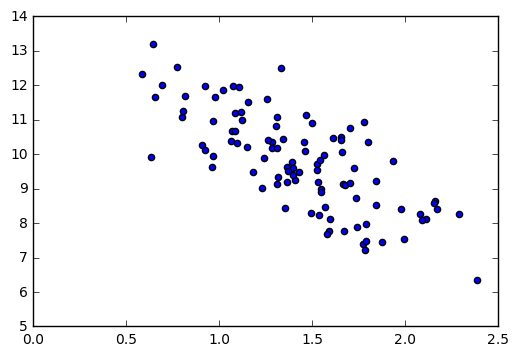

In [4]:
G = data.Random2DGaussian()
X = G.get_sample(100)
plt.scatter(X[:,0], X[:,1])
plt.show()

### 2. Binarna logistička regresija i gradijentni spust

In [5]:
import binlogreg

In [6]:
X,Y_ = data.sample_gauss_2d(2, 100)
# train the model
w,b = binlogreg.binlogreg_train(X, Y_)
# evaluate the model on the training dataset
probs = binlogreg.binlogreg_classify(X, w,b)
Y = [ 1 if a >= 0.5 else 0 for a in probs]
# report performance
accuracy, recall, precision = data.eval_perf_binary(Y, Y_)
AP = data.eval_AP(Y_[probs.argsort()])
print (accuracy, recall, precision, AP)

iteration:  0 loss:  1195.9137169
iteration:  10 loss:  2.00889599585
iteration:  20 loss:  1.69796154628
iteration:  30 loss:  1.47558455556
iteration:  40 loss:  1.30798147286
iteration:  50 loss:  1.17675996968
iteration:  60 loss:  1.07100747599
iteration:  70 loss:  0.98381994407
iteration:  80 loss:  0.910606016482
iteration:  90 loss:  0.848187991069
iteration:  100 loss:  0.794293463404
iteration:  110 loss:  0.747252453413
iteration:  120 loss:  0.705808973898
iteration:  130 loss:  0.668999443207
iteration:  140 loss:  0.636071744992
iteration:  150 loss:  0.60642987352
iteration:  160 loss:  0.579595173912
iteration:  170 loss:  0.555178632361
iteration:  180 loss:  0.532860696911
iteration:  190 loss:  0.512376337515
iteration:  200 loss:  0.493503819402
iteration:  210 loss:  0.476056152558
iteration:  220 loss:  0.459874499288
iteration:  230 loss:  0.444823034336
iteration:  240 loss:  0.430784896275
iteration:  250 loss:  0.417658968244
iteration:  260 loss:  0.40535729

In [8]:
data.eval_AP([0, 0, 0, 1, 1, 1])

1.0

In [9]:
data.eval_AP([0, 0, 1, 0, 1, 1])

0.9166666666666666

In [10]:
data.eval_AP([0, 1, 0, 1, 0, 1])

0.7555555555555555

In [11]:
data.eval_AP([1, 0, 1, 0, 1, 0])

0.5

### 3. Grafički prikaz rezultata klasifikacije

In [12]:
def myDummyDecision(X):
    scores = X[:,0] + X[:,1] - 5
    return scores>0.5

In [14]:
X, Y_ = data.sample_gauss_2d(2, 100)

In [15]:
Y = myDummyDecision(X)>0.5

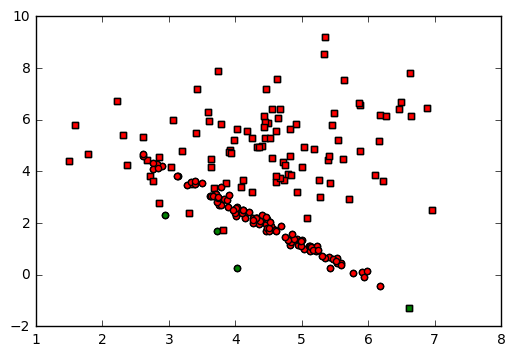

In [17]:
data.graph_data(X, Y_, Y)
plt.show()

### 4. Iscrtavanje funkcije odluke

iteration:  0 loss:  516.44393271
iteration:  10 loss:  114.461977945
iteration:  20 loss:  69.2303397857
iteration:  30 loss:  289.938809062
iteration:  40 loss:  61.0756016742
iteration:  50 loss:  51.3212481893
iteration:  60 loss:  114.381648232
iteration:  70 loss:  47.2848480982
iteration:  80 loss:  67.8485932216
iteration:  90 loss:  54.0953693636
iteration:  100 loss:  37.1641006025
iteration:  110 loss:  53.0836901183
iteration:  120 loss:  61.1378946072
iteration:  130 loss:  32.0968903322
iteration:  140 loss:  27.9067658826
iteration:  150 loss:  111.698304378
iteration:  160 loss:  31.8267643861
iteration:  170 loss:  25.1222485793
iteration:  180 loss:  22.5014478044
iteration:  190 loss:  54.412055969
iteration:  200 loss:  30.937706568
iteration:  210 loss:  22.7792336364
iteration:  220 loss:  19.9688827802
iteration:  230 loss:  18.3825384357
iteration:  240 loss:  18.6974133145
iteration:  250 loss:  158.52118895
iteration:  260 loss:  21.239572571
iteration:  270 l

/home/lkrizan/Documents/Duboko_ucenje/Lab0/du_lab0/binlogreg.py:10: RuntimeWarning: divide by zero encountered in log
  return -y * np.log(h_x) - (1 - y) * np.log(1 - h_x)
/home/lkrizan/Documents/Duboko_ucenje/Lab0/du_lab0/binlogreg.py:10: RuntimeWarning: invalid value encountered in multiply
  return -y * np.log(h_x) - (1 - y) * np.log(1 - h_x)


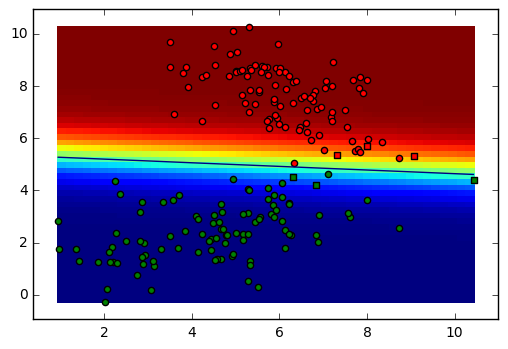

In [19]:
from functools import partial
X,Y_ = data.sample_gauss_2d(2, 100)
# train the model
w,b = binlogreg.binlogreg_train(X, Y_)
# evaluate the model on the training dataset
probs = binlogreg.binlogreg_classify(X, w,b)
Y = [ 1 if a >= 0.5 else 0 for a in probs]
# report performance
accuracy, recall, precision = data.eval_perf_binary(Y, Y_)
AP = data.eval_AP(Y_[probs.argsort()])
print (accuracy, recall, precision, AP)
func = partial(binlogreg.binlogreg_classify, w=w, b=b)
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(func, bbox, offset=0.5)
data.graph_data(X, Y_, Y)
plt.show()

### 5. Graficki prikaz binarne logisticke regresije

In [20]:
def binlogreg_decfun(X, w, b):
    def classify(X):
        return binlogreg.binlogreg_classify(X, w, b)
    return classify

iteration:  0 loss:  257.811590094
iteration:  10 loss:  47.3329843322
iteration:  20 loss:  48.4121788596
iteration:  30 loss:  38.165056179
iteration:  40 loss:  34.948754215
iteration:  50 loss:  33.9806275003
iteration:  60 loss:  31.4672814195
iteration:  70 loss:  29.0925973448
iteration:  80 loss:  27.4271660742
iteration:  90 loss:  26.0272083282
iteration:  100 loss:  24.7609303946
iteration:  110 loss:  23.6523030261
iteration:  120 loss:  22.7183210285
iteration:  130 loss:  21.9687972616
iteration:  140 loss:  21.4040847143
iteration:  150 loss:  20.9884650265
iteration:  160 loss:  20.6590154043
iteration:  170 loss:  20.3721818362
iteration:  180 loss:  20.1127260627
iteration:  190 loss:  19.8758223414
iteration:  200 loss:  19.6585954405
iteration:  210 loss:  19.4587116239
iteration:  220 loss:  19.2741989369
iteration:  230 loss:  19.1033757532
iteration:  240 loss:  18.9447984328
iteration:  250 loss:  18.7972203288
iteration:  260 loss:  18.6595591131
iteration:  27

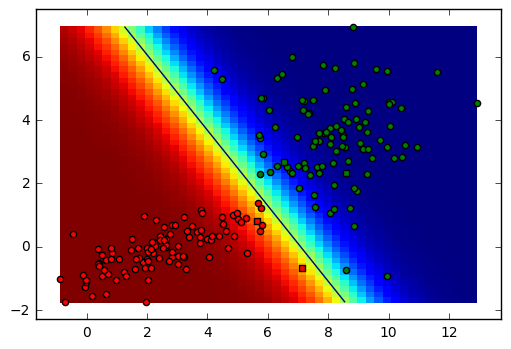

In [21]:
X,Y_ = data.sample_gauss_2d(2, 100)
# train the model
w,b = binlogreg.binlogreg_train(X, Y_)
# evaluate the model on the training dataset
probs = binlogreg.binlogreg_classify(X, w,b)
Y = [ 1 if a >= 0.5 else 0 for a in probs]
# report performance
accuracy, recall, precision = data.eval_perf_binary(Y, Y_)
AP = data.eval_AP(Y_[probs.argsort()])
print (accuracy, recall, precision, AP)
func = binlogreg_decfun(X, w, b)
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(func, bbox, offset=0.5)
data.graph_data(X, Y_, Y)
plt.show()

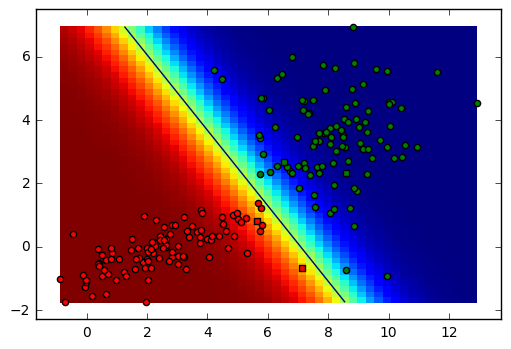

In [22]:
# or, better, using lambda functions
func = lambda x: binlogreg.binlogreg_classify(x, w, b)
bbox=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(func, bbox, offset=0.5)
data.graph_data(X, Y_, Y)
plt.show()

### 6. Viserazredna logisticka regresija

In [ ]:
def logreg_train(X, Y_, param_niter=1000, param_delta=0.005):
    """
    X:  array-like, N x n - data
    Y_: array-like, N x 1 - actual outputs
    return: W, b
            W: array-like, n x C
            b: array-like, 1 x C
    """
    # number of classes
    C = max(Y_) + 1
    # number of dimensions
    n = X.shape(1)
    # initial values
    W = np.random.randn(n, C)
    b = np.array([0] * C)
    for i in range(param_niter):
        scores = np.dot(X, W) + b
    